In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.utils import shuffle
from sklearn import ensemble, tree, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def draw_missing_data_table(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data.head(30)

In [3]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [4]:
#bring in the six packs
train = pd.read_csv('./house_data/train.csv')
test  = pd.read_csv('./house_data/test.csv')

In [5]:
#check the decoration
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Overview
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

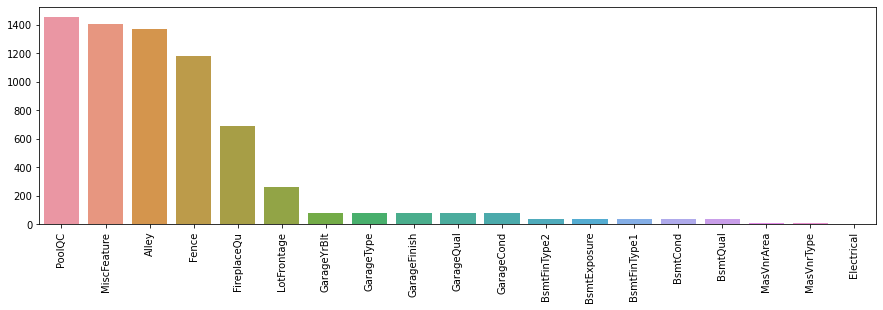

In [7]:
train_labels = train.pop('SalePrice')
Myfeatures = pd.concat([train, test], keys=['train', 'test'])

# Check missng value.
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(15,4))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)

In [8]:
# Analyse missing data
draw_missing_data_table(train)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [9]:
Myfeatures.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'Heating', 'Alley', 'LowQualFinSF','BsmtFullBath', 'BsmtHalfBath', 'Functional', 
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
            'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageArea', 'BsmtUnfSF','BsmtFinSF1', 'BsmtFinSF2','KitchenAbvGr','KitchenQual','MasVnrType'],
            axis=1, inplace=True)
# Overview again
Myfeatures.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
train 0   1          60       RL     8450   Pave      Reg         Lvl   
      1   2          20       RL     9600   Pave      Reg         Lvl   
      2   3          60       RL    11250   Pave      IR1         Lvl   
      3   4          70       RL     9550   Pave      IR1         Lvl   
      4   5          60       RL    14260   Pave      IR1         Lvl   

        LotConfig LandSlope Neighborhood      ...      GarageType  \
train 0    Inside       Gtl      CollgCr      ...          Attchd   
      1       FR2       Gtl      Veenker      ...          Attchd   
      2    Inside       Gtl      CollgCr      ...          Attchd   
      3    Corner       Gtl      Crawfor      ...          Detchd   
      4       FR2       Gtl      NoRidge      ...          Attchd   

        GarageFinish GarageCars GarageQual  GarageCond  PavedDrive  MoSold  \
train 0          RFn        2.0         TA          TA           Y       2   
      1          RFn        2.0         TA          TA           Y       5   
      2          RFn        2.0         TA          TA           Y       9   
      3          Unf        3.0         TA          TA           Y       2   
      4          RFn        3.0         TA          TA           Y      12   

         YrSold SaleType SaleCondition  
train 0    2008       WD        Normal  
      1    2007       WD        Normal  
      2    2008       WD        Normal  
      3    2006       WD       Abnorml  
      4    2008       WD        Normal  

[5 rows x 51 columns]

In [10]:
# Foucs on what I interest.
df1 = train.filter(regex=('Garage*'))
df1.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


In [11]:
Myfeatures['GarageType'] = Myfeatures['GarageType'].fillna('NA')
Myfeatures['GarageFinish'] = Myfeatures['GarageFinish'].fillna('NA')
Myfeatures['GarageQual'] = Myfeatures['GarageQual'].fillna('No_Garage')
Myfeatures['GarageCond'] = Myfeatures['GarageCond'].fillna('No_Garage')

In [12]:
df2 = train.filter(regex=('Bsmt*'))
df2.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,0,1
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,0
3,TA,Gd,No,ALQ,216,Unf,0,540,756,1,0
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,0


In [13]:
Myfeatures['BsmtQual'] = Myfeatures['BsmtQual'].fillna('NA')
Myfeatures['BsmtCond'] = Myfeatures['BsmtCond'].fillna('NA')
Myfeatures['BsmtExposure'] = Myfeatures['BsmtExposure'].fillna('NA')
Myfeatures['BsmtFinType1'] = Myfeatures['BsmtFinType1'].fillna('NA')
Myfeatures['BsmtFinType2'] = Myfeatures['BsmtFinType2'].fillna('NA')

In [14]:
# MSSubClass as str
Myfeatures['MSSubClass'] = Myfeatures['MSSubClass'].astype(str)
# MSZoning NA in pred. filling with most popular values
Myfeatures['MSZoning'] = Myfeatures['MSZoning'].fillna(Myfeatures['MSZoning'].mode()[0])
# TotalBsmtSF  NA in pred. I suppose NA means 0
Myfeatures['TotalBsmtSF'] = Myfeatures['TotalBsmtSF'].fillna(0)
# Electrical NA in pred. filling with most popular values
Myfeatures['Electrical'] = Myfeatures['Electrical'].fillna(Myfeatures['Electrical'].mode()[0])
# Year and Month to categorical
Myfeatures['YrSold'] = Myfeatures['YrSold'].astype(str)
Myfeatures['MoSold'] = Myfeatures['MoSold'].astype(str)

# Converting OverallCond to str
Myfeatures.OverallCond = Myfeatures.OverallCond.astype(str)

# GarageCars  NA in pred. I suppose NA means 0
Myfeatures['GarageCars'] = Myfeatures['GarageCars'].fillna(0.0)

# SaleType NA in pred. filling with most popular values
Myfeatures['SaleType'] = Myfeatures['SaleType'].fillna(Myfeatures['SaleType'].mode()[0])

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
Myfeatures['TotalSF'] = Myfeatures['TotalBsmtSF'] + Myfeatures['1stFlrSF'] + Myfeatures['2ndFlrSF']
Myfeatures.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [15]:
Myfeatures.head()

Id MSSubClass MSZoning  LotArea Street LotShape LandContour  \
train 0   1         60       RL     8450   Pave      Reg         Lvl   
      1   2         20       RL     9600   Pave      Reg         Lvl   
      2   3         60       RL    11250   Pave      IR1         Lvl   
      3   4         70       RL     9550   Pave      IR1         Lvl   
      4   5         60       RL    14260   Pave      IR1         Lvl   

        LotConfig LandSlope Neighborhood   ...   GarageFinish GarageCars  \
train 0    Inside       Gtl      CollgCr   ...            RFn        2.0   
      1       FR2       Gtl      Veenker   ...            RFn        2.0   
      2    Inside       Gtl      CollgCr   ...            RFn        2.0   
      3    Corner       Gtl      Crawfor   ...            Unf        3.0   
      4       FR2       Gtl      NoRidge   ...            RFn        3.0   

        GarageQual GarageCond  PavedDrive MoSold  YrSold  SaleType  \
train 0         TA         TA           Y      2    2008        WD   
      1         TA         TA           Y      5    2007        WD   
      2         TA         TA           Y      9    2008        WD   
      3         TA         TA           Y      2    2006        WD   
      4         TA         TA           Y     12    2008        WD   

        SaleCondition TotalSF  
train 0        Normal  2566.0  
      1        Normal  2524.0  
      2        Normal  2706.0  
      3       Abnorml  2473.0  
      4        Normal  3343.0  

[5 rows x 49 columns]

In [16]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


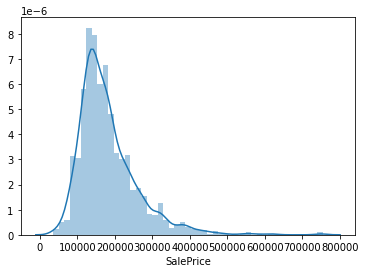

In [17]:
ax = sns.distplot(train_labels)

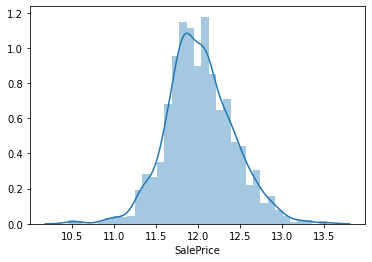

In [18]:
## Log transformation of labels
train_labels = np.log(train_labels)
ax = sns.distplot(train_labels)

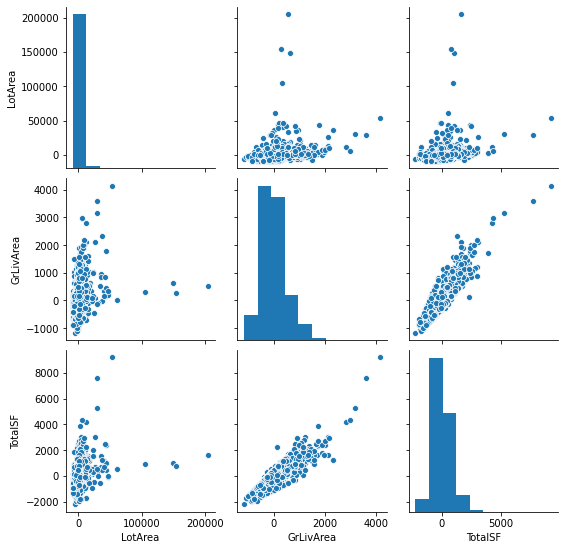

In [19]:
## Standardizing numeric features
numeric_features = Myfeatures.loc[:,['LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())
ax = sns.pairplot(numeric_features_standardized)


In [20]:
# Getting Dummies from Condition1 and Condition2
conditions = set([x for x in Myfeatures['Condition1']] + [x for x in Myfeatures['Condition2']])
dummies = pd.DataFrame(data=np.zeros((len(Myfeatures.index), len(conditions))),
                       index=Myfeatures.index, columns=conditions)

for i, cond in enumerate(zip(Myfeatures['Condition1'], Myfeatures['Condition2'])):
    dummies.ix[i, cond] = 1

Myfeatures = pd.concat([Myfeatures, dummies.add_prefix('Condition_')], axis=1)
Myfeatures.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

# Getting Dummies from Exterior1st and Exterior2nd
exteriors = set([x for x in Myfeatures['Exterior1st']] + [x for x in Myfeatures['Exterior2nd']])
dummies = pd.DataFrame(data=np.zeros((len(Myfeatures.index), len(exteriors))),
                       index=Myfeatures.index, columns=exteriors)

for i, ext in enumerate(zip(Myfeatures['Exterior1st'], Myfeatures['Exterior2nd'])):
    dummies.ix[i, ext] = 1

Myfeatures = pd.concat([Myfeatures, dummies.add_prefix('Exterior_')], axis=1)
Myfeatures.drop(['Exterior1st', 'Exterior2nd'], axis=1, inplace=True)

# Getting Dummies from all other categorical vars
for col in Myfeatures.dtypes[Myfeatures.dtypes == 'object'].index:
    for_dummy = Myfeatures.pop(col)
    Myfeatures = pd.concat([Myfeatures, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [21]:
np.isnan(Myfeatures).any()

Id                       False
LotArea                  False
OverallQual              False
YearBuilt                False
YearRemodAdd             False
GrLivArea                False
FullBath                 False
HalfBath                 False
BedroomAbvGr             False
TotRmsAbvGrd             False
Fireplaces               False
GarageCars               False
TotalSF                  False
Condition_RRAn           False
Condition_PosN           False
Condition_RRAe           False
Condition_Feedr          False
Condition_Norm           False
Condition_PosA           False
Condition_Artery         False
Condition_RRNn           False
Condition_RRNe           False
Exterior_AsbShng         False
Exterior_nan             False
Exterior_Plywood         False
Exterior_VinylSd         False
Exterior_ImStucc         False
Exterior_MetalSd         False
Exterior_Stone           False
Exterior_BrkFace         False
                         ...  
MoSold_11                False
MoSold_1

In [22]:
#Myfeatures.dropna(inplace=True)
#np.isnan(Myfeatures).any()

In [23]:
### Copying features
features_standardized = Myfeatures.copy()
### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)

In [24]:
### Splitting features
train_features = Myfeatures.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features = Myfeatures.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

### Splitting standardized features
train_features_st = features_standardized.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features_st = features_standardized.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

In [25]:
### Shuffling train sets
train_features_st, train_features, train_labels = shuffle(train_features_st, train_features, train_labels, random_state = 5)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)

In [27]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train_st, y_train_st)
train_test(ENSTest, x_train_st, x_test_st, y_train_st, y_test_st)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
             cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
             n_jobs=None, normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.8991316343963645
RMSE: 0.12046544072657156
Test
R2: 0.8976049761333199
RMSE: 0.10895025536887873
